## HW5: Webscraping and Pandas

Note that this is a modified version of HW5.  The first part, concerning the use of selenium, is just for your edification.

In [1]:
from bs4 import BeautifulSoup as bsoup
import requests
from time import sleep
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

#### Note that you need the driver binaries in a system path.  To view those paths you can run the following shell command.

In [2]:
# !echo $PATH

#### Setting the service object and initializing the driver.

In [3]:
# service = ChromeService(executable_path="/usr/local/bin/chrome-mac-arm64/Google Chrome for Testing.app")
# driver = webdriver.Chrome(service=service)
# driver.get('https://weather.com/')

# soup = bsoup(driver.page_source, 'lxml')

In [4]:
# search_string = 'USA, 80111'
# zipsearch = driver.find_element(By.ID, "LocationSearch_input")
# zipsearch.send_keys(search_string)
# sleep(3)
# driver.find_element(By.XPATH, '//*[@id="LocationSearch_listbox-0"]').click()

## The Actual Assignment Starts Here (9 points total)

### Monthly weather can be accessed through weather.com by passing lat and lon coordinates in the URL.  For this assignment we will specify one pair of lat/lon coordinates and scrape the montly weather data from that page.  See below for an example url. Note that we could easily extend this by specifying a list of tuples and iterating over those coordinate pairs.

__For this part, all you need to do is specify lat/lon coords and make a good request.__ (1 point)

https://weather.com/weather/monthly/l/39.7393,-104.9844

In [5]:
locations = (39.7392, -104.9902) # your tuple of lat/lon coords.

base_url = "https://weather.com/weather/monthly/l/"
temp_url = base_url + str(locations[0]) + ',' + str(locations[1])
response = requests.get(temp_url)

In [6]:
print(temp_url)

https://weather.com/weather/monthly/l/39.7392,-104.9902


In [7]:
response.status_code

200

In [8]:
soup = bsoup(response.text, 'html.parser')

<!DOCTYPE html>
<html dir="ltr" lang="en-US">
 <head>
  <meta charset="utf-8" data-react-helmet="true"/>
  <meta content="width=device-width, initial-scale=1, viewport-fit=cover" data-react-helmet="true" name="viewport"/>
  <meta content="max-image-preview:large" data-react-helmet="true" name="robots"/>
  <meta content="index, follow" data-react-helmet="true" name="robots"/>
  <meta content="origin" data-react-helmet="true" name="referrer"/>
  <meta content="Weather.com brings you the most accurate monthly weather forecast for Denver, CO with average/record and high/low temperatures, precipitation and more." data-react-helmet="true" name="description"/>
  <meta content="#ffffff" data-react-helmet="true" name="msapplication-TileColor"/>
  <meta content="/monthly/assets/ms-icon-144x144.d353af.png" data-react-helmet="true" name="msapplication-TileImage"/>
  <meta content="#ffffff" data-react-helmet="true" name="theme-color"/>
  <meta content="app-id=295646461" data-react-helmet="true" nam
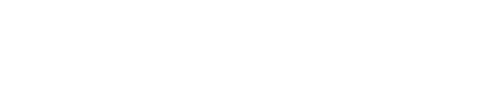
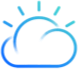

In [9]:
print(soup.prettify())

#### Below, to get you started I've run find_all using a very basic regex to match the class name we're concerned with.

In [10]:
import re
from datetime import datetime
import pandas as pd
import time

#### Below we're printing out the information comprising a single calendar day.

In [11]:
cal = soup.find_all('button', {'class': re.compile("Button--default--2gfm1 CalendarDateCell*")})
day = []
month = []
phases =[]
weath = []
day_of_wk =[]
high = []
low = []

### We can continue to use bs4 to parse these data, or we can cast the elements in cal (our days) to str and use str methods to parse.  This is up to you.

_**Pull out the following information for each day and store them in a Pandas DataFrame:**_  (3 points)

-month: The month component of the date.  Note date is expressed as month/day. For example, 9/25.

-day: Numerical day of the month

-moon_phase: Day n

-weather_desc: (e.g., mostly cloudy, sunny, rain, etc.)

_**Also build a new feature, day, which will represent the day of the week (e.g., Monday, Tuesday, etc.)
This information isn't included in the text, but can be computed. Retain the weather_desc feature. **_ (1 point)

In [12]:
# format_data = "%m/%d/%y"
# temp_date = cal[0]["data-id"].replace("calendar-", "")+ '/2023'
# temp_date =datetime.strptime(temp_date, "%m/%d/%Y")
# temp_date.day
# temp_date.month
# print(temp_date.strftime('%A'))


# print(cal[0].find('svg')['name'])
# for i in range(len(cal)):
#     cal[i].find_all('set').find('weather').text
    

# print(cal[-6].find('svg', {'set':'weather'}))

# #High
# temp = cal[0].find('div',{'class':re.compile('CalendarDateCell--tempHigh*')}).text
# temp = list([x for x in temp if x.isalnum()])
# temp = int("".join(temp))
# print(type(temp), temp)
# #Low
# print(cal[0].find('div',{'class':re.compile('CalendarDateCell--tempLow*')}).text)

In [13]:
format_data = "%m/%d/%y"
for i in range(len(cal)):
    # Get the date
    temp_date = cal[i]["data-id"].replace("calendar-", "")+ '/2023'
    temp_date =datetime.strptime(temp_date, "%m/%d/%Y")
    month.append(temp_date.month)
    day.append(temp_date.day)
    day_of_wk.append(temp_date.strftime('%A'))
    phases.append(cal[i].find('svg')['name'])
    
    try:
        temp_weath = cal[i].find('svg', {'set':'weather'})['name']
        if temp_weath is not None:
            weath.append(temp_weath)
    except:
        #There is no forcast this far out
        weath.append(None)
        
    temp_hi = cal[i].find('div',{'class':re.compile('CalendarDateCell--tempHigh*')}).text
    try:
        if temp_hi is not None:
            temp_hi =list([x for x in temp_hi if x.isalnum()])
            temp_hi = int("".join(temp_hi))
            high.append(temp_hi)
    except:
        high.append(None)
        
    temp_lo = cal[i].find('div',{'class':re.compile('CalendarDateCell--tempLow*')}).text
    try:
        if temp_lo is not None:
            temp_lo =list([x for x in temp_lo if x.isalnum()])
            temp_lo = int("".join(temp_lo))
            low.append(temp_lo)
    except:
        low.append(None)
# print(month, day, day_of_wk)
# print(phases)
# print(weath)
# print(high)
print(len(month))
print(len(low))

42
42


In [14]:
df = pd.DataFrame()
df["Month"] = month
df["Day"] = day
df["Moon_phase"] = phases
df["Weather"] = weath
df["Day_of_Week"] = day_of_wk
df["High_Temp"] = high
df["Low_Temp"] = low
df.head()

,Month,Day,Moon_phase,Weather,Day_of_Week,High_Temp,Low_Temp
0,6,25,phase-6,mostly-sunny,Sunday,85.0,58
1,6,26,phase-7,mostly-sunny,Monday,90.0,63
2,6,27,phase-8,partly-cloudy,Tuesday,94.0,64
3,6,28,phase-9,partly-cloudy,Wednesday,87.0,64
4,6,29,phase-10,scattered-thunderstorms,Thursday,84.0,55


### Now build the following feature:

-temp_diff: The difference between the high and low daily temperature. (1 point)

In [15]:
df["Temp_diff"] = df["High_Temp"] - df["Low_Temp"]
df.head()

,Month,Day,Moon_phase,Weather,Day_of_Week,High_Temp,Low_Temp,Temp_diff
0,6,25,phase-6,mostly-sunny,Sunday,85.0,58,27.0
1,6,26,phase-7,mostly-sunny,Monday,90.0,63,27.0
2,6,27,phase-8,partly-cloudy,Tuesday,94.0,64,30.0
3,6,28,phase-9,partly-cloudy,Wednesday,87.0,64,23.0
4,6,29,phase-10,scattered-thunderstorms,Thursday,84.0,55,29.0


### Build Dummy Variables to represent weather_desc.  These are binary features.  You will have one for each of the unique categories in weather_desc.  These categories only need to represent the data that you have scraped. 
(1 point)

In [16]:
#lets see what values there are to start
df['Weather'].dtypes


dtype('O')

In [17]:
# Lets change them from objects (strings) to catagorical
df['Weather'] = df['Weather'].astype('category')
df['Weather'].dtypes

CategoricalDtype(categories=['foggy', 'isolated-thunderstorms', 'mostly-clear-night',
                  'mostly-sunny', 'partly-cloudy', 'rain', 'scattered-showers',
                  'scattered-thunderstorms', 'sunny'],
, ordered=False)

#### Use your DataFrame to answer the following questsions.

__Using only the data you collected from a single page (42 days).  What is the average high temperature for each month?__ (1 point)

In [25]:
print(len(df))
df['High_Temp'].mean()

42


86.97560975609755

__Pivot your DataFrame to show the average high temperature over the entire dataset by the weather_desc categories__ (1 point)

In [29]:
pivoted = df.pivot_table(index ='Weather', values="High_Temp", aggfunc = "mean")
pivoted

,High_Temp
Weather,
foggy,79.000000
isolated-thunderstorms,89.000000
mostly-sunny,88.571429
partly-cloudy,89.800000
rain,71.000000
scattered-showers,70.000000
scattered-thunderstorms,81.333333
sunny,94.000000
